In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale, StandardScaler

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, concatenate
from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import seaborn as sns


Using TensorFlow backend.


In [44]:
raw_data = pd.read_csv('./data/ordered_molecules.csv')

In [45]:
raw_data.tail()

,time,molecule,px,py,pz,ax,ay,az
255995,1999,124,10.61230,9.20293,8.07598,-1.025038,3.645025,-1.280867
255996,1999,125,12.28148,7.63805,8.68123,3.634594,-3.766582,-2.338953
255997,1999,126,6.03300,12.81292,6.05135,2.307742,5.650190,5.404642
255998,1999,127,9.50306,10.44102,9.99912,1.395564,-1.232665,-0.779073
255999,1999,128,12.01283,11.18948,11.90577,-0.730089,-1.992210,-0.056095


In [46]:
def generate_data(t):
    df = raw_data.loc[raw_data['time'] == t]
    
    px_plus = df.iloc[:,2] + 12.9168567587204
    px_origin = df.iloc[:,2]
    px_minus = df.iloc[:,2] - 12.9168567587204
    
    py_plus = df.iloc[:,3] + 12.9168567587204
    py_origin = df.iloc[:,3]
    py_minus = df.iloc[:,3] - 12.9168567587204
    
    pz_plus = df.iloc[:,4] + 12.9168567587204
    pz_origin = df.iloc[:,4]
    pz_minus = df.iloc[:,4] - 12.9168567587204
    
    #plus
    data_mod_1 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_2 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_3 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_4 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_5 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_6 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_7 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #minus
    data_mod_8 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_9 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_10 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_11 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_12 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_13 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_14 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    #plus + minus
    data_mod_15 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_16 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_17 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_18 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    data_mod_19 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_20 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #3
    data_mod_21 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_22 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_23 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_24 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_25 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_26 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_27 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    combined_df = pd.concat([data_mod_27.reset_index(drop=True), data_mod_1.reset_index(drop=True), data_mod_2.reset_index(drop=True), data_mod_3.reset_index(drop=True), 
                           data_mod_4.reset_index(drop=True), data_mod_5.reset_index(drop=True), data_mod_6.reset_index(drop=True), data_mod_7.reset_index(drop=True), 
                           data_mod_8.reset_index(drop=True), data_mod_9.reset_index(drop=True), data_mod_10.reset_index(drop=True), data_mod_11.reset_index(drop=True),
                           data_mod_12.reset_index(drop=True), data_mod_13.reset_index(drop=True), data_mod_14.reset_index(drop=True), data_mod_15.reset_index(drop=True),
                           data_mod_16.reset_index(drop=True), data_mod_17.reset_index(drop=True), data_mod_18.reset_index(drop=True), data_mod_19.reset_index(drop=True),
                           data_mod_20.reset_index(drop=True), data_mod_21.reset_index(drop=True), data_mod_22.reset_index(drop=True), data_mod_23.reset_index(drop=True),
                           data_mod_24.reset_index(drop=True), data_mod_25.reset_index(drop=True), data_mod_26.reset_index(drop=True)], axis = 0, ignore_index = True)
    
    
    df_acc = pd.concat([df.iloc[:,5:].reset_index(drop=True), df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True)], axis = 0, ignore_index = True)
    
    mol_num = range(1,combined_df.shape[0]+1)
    combined_df['molecule'] = mol_num
    
    result_df = pd.concat([df_acc.reset_index(drop=True), combined_df.reset_index(drop=True)], axis = 1, ignore_index = True)
    result_df.columns = ["ax", "ay", "az", "px", "py", "pz", "molecule"]
    
    result_df = result_df[["molecule", "px", "py", "pz", "ax", "ay", "az"]]
    return(result_df)

In [47]:
generate_data(0).tail()

,molecule,px,py,pz,ax,ay,az
3451,3452,-2.282917,23.957887,-8.189287,2.826494,0.120729,3.561412
3452,3453,-3.424287,22.244557,-6.353907,0.540960,2.726446,-0.040251
3453,3454,-1.724537,24.117957,-5.084297,0.363945,-0.033185,0.824533
3454,3455,-2.970927,22.454267,-3.323367,-0.612577,1.925591,-0.319277
3455,3456,-1.005977,24.060017,-1.581507,-3.718706,0.246769,-1.344216


In [48]:
def find_neighbors(t):
    df_gen = generate_data(t)
    
    k = 9
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(df_gen)
    distances, indices = nbrs.kneighbors(df_gen)
    
    return(k, df_gen, indices[:128], distances[:128])

In [49]:
def make_df(t):
    t_df = raw_data.loc[raw_data['time']==t]
    t_plus_1_df = raw_data.loc[raw_data['time']==t+1]
    
    acc_t_plus_1 = t_plus_1_df.iloc[:,5:]
    delta_position = pd.DataFrame(np.array(t_plus_1_df.iloc[:,2:5]) - np.array(t_df.iloc[:,2:5]), columns=['dlt_px','dlt_py','dlt_pz'])
    
    k, df_gen, indices, dist = find_neighbors(t)
    
    li = []
    for i in range(0,indices.shape[0]):
        rows = []
        for j in range(1,k):
            row = df_gen.loc[df_gen['molecule'] == (indices[i][j]+1)]
            row_rp = row.iloc[:,1:4] - t_df.iloc[i,2:5]
            row_acc = pd.DataFrame(np.array(row.iloc[:,4:]) / dist[i][j])
            
            row_combined = np.array(pd.concat([row_rp.reset_index(drop=True), row_acc.reset_index(drop=True)], axis = 1))
            rows.append(row_combined)
        
        li.append(np.array(rows).ravel())
    
    acc_df = t_df[['time','ax','ay','az']]
    neighbors_df = pd.DataFrame(li)
    acc_t_plus_1.columns = ['next_ax','next_ay','next_az']
    
    df_made = pd.concat([acc_df.reset_index(drop=True), neighbors_df.reset_index(drop=True), 
                         delta_position.reset_index(drop=True), acc_t_plus_1.reset_index(drop=True)], axis = 1)
    
    return(df_made)

In [9]:
#make whole dataset
final_data = make_df(0)

for t in range(1,1999):
    df_part = make_df(t)
    final_data = pd.concat([final_data, df_part], axis = 0, ignore_index=True)

In [ ]:
make_df(0)

In [79]:
final_data.tail()

,time,ax,ay,az,0,1,2,3,4,5,...,44,45,46,47,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
255867,1998,-1.117306,3.729599,-1.309010,-1.11728,1.23271,1.93306,0.237879,-0.160086,-0.135830,...,-7.90545,-0.505162,-0.084367,-0.224528,-0.00663,0.00362,0.00284,-1.025038,3.645025,-1.280867
255868,1998,3.562240,-3.790684,-2.208148,-2.78356,2.79630,1.33114,0.277607,-0.186822,-0.158515,...,-7.15338,0.396960,-0.242948,0.197936,-0.00373,0.00233,0.00617,3.634594,-3.766582,-2.338953
255869,1998,1.966739,5.790018,5.545910,4.58574,-3.60994,2.02446,-0.110142,0.367657,-0.129040,...,-0.80648,-0.077386,0.048067,0.211089,-0.00019,0.00367,0.00267,2.307742,5.650190,5.404642
255870,1998,1.619934,-1.090169,-0.924991,2.50430,0.75071,1.88872,-0.141009,-0.452479,0.009933,...,-3.95752,0.176852,0.520645,0.498695,0.00141,0.00900,-0.00708,1.395564,-1.232665,-0.779073
255871,1998,-0.597181,-1.916267,0.042068,-2.50430,-0.75071,-1.88872,0.382507,-0.257416,-0.218414,...,-7.81960,-0.494961,0.294826,-0.059732,0.00688,0.00675,0.01085,-0.730089,-1.992210,-0.056095


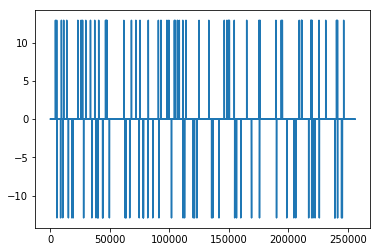

In [192]:
plt.plot(final_data['dlt_px'])

In [11]:
##########################################################
################# save dataframe #########################
#final_data.to_csv('./data/KNN_8_P_A.csv', index = False)

## **Read Data**

In [28]:
final_data = pd.read_csv('./data/KNN_8_P_A.csv')

In [29]:
final_data.tail()

,time,ax,ay,az,0,1,2,3,4,5,...,44,45,46,47,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
255867,1998,-1.117306,3.729599,-1.309010,-1.11728,1.23271,1.93306,0.237879,-0.160086,-0.135830,...,-7.90545,-0.505162,-0.084367,-0.224528,-0.00663,0.00362,0.00284,-1.025038,3.645025,-1.280867
255868,1998,3.562240,-3.790684,-2.208148,-2.78356,2.79630,1.33114,0.277607,-0.186822,-0.158515,...,-7.15338,0.396960,-0.242948,0.197936,-0.00373,0.00233,0.00617,3.634594,-3.766582,-2.338953
255869,1998,1.966739,5.790018,5.545910,4.58574,-3.60994,2.02446,-0.110142,0.367657,-0.129040,...,-0.80648,-0.077386,0.048067,0.211089,-0.00019,0.00367,0.00267,2.307742,5.650190,5.404642
255870,1998,1.619934,-1.090169,-0.924991,2.50430,0.75071,1.88872,-0.141009,-0.452479,0.009933,...,-3.95752,0.176852,0.520645,0.498695,0.00141,0.00900,-0.00708,1.395564,-1.232665,-0.779073
255871,1998,-0.597181,-1.916267,0.042068,-2.50430,-0.75071,-1.88872,0.382507,-0.257416,-0.218414,...,-7.81960,-0.494961,0.294826,-0.059732,0.00688,0.00675,0.01085,-0.730089,-1.992210,-0.056095


In [30]:
exc_x_idx, = np.where(abs(final_data['dlt_px']) > 12)
exc_y_idx, = np.where(abs(final_data['dlt_py']) > 12)
exc_z_idx, = np.where(abs(final_data['dlt_pz']) > 12)

exc_idx = set(exc_x_idx) | set(exc_y_idx) | set(exc_z_idx)

final_data_modi = final_data.loc[final_data.index.drop(list(exc_idx))].reset_index(drop=True)

In [31]:
x_train = final_data_modi.loc[(final_data_modi['time'] >= 0) & (final_data_modi['time'] <= 1399)].iloc[:,1:52]
y_train = final_data_modi.loc[(final_data_modi['time'] >= 0) & (final_data_modi['time'] <= 1399)].iloc[:,52:]

x_test = final_data_modi.loc[(final_data_modi['time'] >= 1400) & (final_data_modi['time'] <= 1998)].iloc[:,1:52]
y_test = final_data_modi.loc[(final_data_modi['time'] >= 1400) & (final_data_modi['time'] <= 1998)].iloc[:,52:]

/usr/local/anaconda/envs/env_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


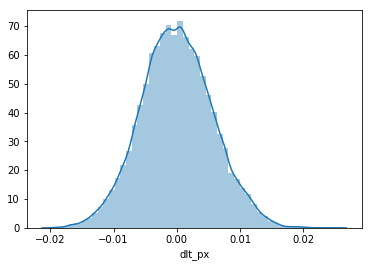

In [32]:
sns.distplot(y_train['dlt_px'])

/usr/local/anaconda/envs/env_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


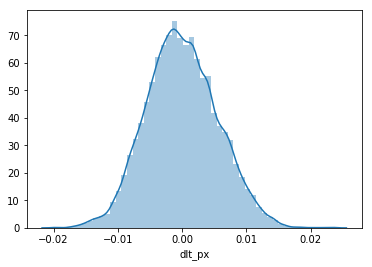

In [33]:
sns.distplot(y_test['dlt_px'])

In [34]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

#Regularization
x_train_scaled = pd.DataFrame(x_scaler.transform(x_train))
y_train_scaled = pd.DataFrame(y_scaler.transform(y_train), columns=['dlt_x','dlt_y','dlt_z','ax_next','ay_next','az_next'])

x_test_scaled = pd.DataFrame(x_scaler.transform(x_test))
y_test_scaled = pd.DataFrame(y_scaler.transform(y_test), columns=['dlt_x','dlt_y','dlt_z','ax_next','ay_next','az_next'])


In [ ]:
kernel_initializer.

In [52]:
#model 1

acc_input = Input(shape=(3,), name='acc_input')
x_acc = Dense(3, activation='relu', kernel_initializer='he_normal')(acc_input)
BN_acc = BatchNormalization()(x_acc)
acc_output = Dense(1, activation='linear', kernel_initializer='glorot_normal')(BN_acc)

nearest_position_input = Input(shape = (24,), name='nearest_position_input')
x_p = Dense(16, activation = 'relu', kernel_initializer='he_normal')(nearest_position_input)
BN_p = BatchNormalization()(x_p)
nearest_position_ouput = Dense(8, activation='linear', kernel_initializer='glorot_normal')(BN_p)

nearest_acc_input = Input(shape = (24,), name='nearest_acc_input')
x_acc_2 = Dense(16, activation = 'relu', kernel_initializer='he_normal')(nearest_acc_input)
BN_acc_2 = BatchNormalization()(x_acc_2)
nearest_acc_ouput = Dense(8, activation='linear', kernel_initializer='glorot_normal')(BN_acc_2)

x_final_input = concatenate([acc_output, nearest_position_ouput, nearest_acc_ouput])
x = Dense(18, activation = 'relu', kernel_initializer='he_normal')(x_final_input)
x = BatchNormalization()(x)
x = Dense(36, activation = 'relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dense(36, activation = 'relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
main_output = Dense(6, activation = 'linear', kernel_initializer='glorot_normal')(x)

model_1 = Model(inputs=[acc_input, nearest_position_input, nearest_acc_input], outputs = main_output)

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')
model_check_point = ModelCheckpoint('./model/KNN_8_P_A.h5', monitor = 'val_loss', verbose=2, save_best_only=True)

callback_list = [model_check_point, early_stop]

In [64]:
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])

hist_1 = model_1.fit([x_train_scaled.iloc[:,0:3],
                      x_train_scaled.iloc[:,3:6],
                      x_train_scaled.iloc[:,[6,7,8,12,13,14,18,19,20,24,25,26,30,31,32,36,37,38,42,43,44,48,49,50]],
                      x_train_scaled.iloc[:,[9,10,11,15,16,17,21,22,23,27,28,29,33,34,35,39,40,41,45,46,47,51,52,53]]], [y_train_scaled],
                      
                      validation_data=([x_test_scaled.iloc[:,0:3],
                      x_test_scaled.iloc[:,3:6],
                      x_test_scaled.iloc[:,[6,7,8,12,13,14,18,19,20,24,25,26,30,31,32,36,37,38,42,43,44,48,49,50]],
                      x_test_scaled.iloc[:,[9,10,11,15,16,17,21,22,23,27,28,29,33,34,35,39,40,41,45,46,47,51,52,53]]], [y_test_scaled]),
                      batch_size = 64, epochs = 150, verbose=2, callbacks = callback_list)

IndexError: positional indexers are out-of-bounds

In [ ]:
'''
model_1.compile(loss='mean_absolute_percentage_error', optimizer= 'adam', metrics=['mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')
model_check_point = ModelCheckpoint('./model/KNN_8_P_A.h5', monitor = 'val_loss', verbose=2, save_best_only=True)

callback_list = [model_check_point, early_stop]
'''

In [ ]:
#hist_1 = model_1.fit([x_train_scaled.iloc[:,0:3],x_train_scaled.iloc[:,[3,4,5,9,10,11,15,16,17,21,22,23,27,28,29,33,34,35,39,40,41,45,46,47]],
#            x_train_scaled.iloc[:,[6,7,8,12,13,14,18,19,20,24,25,26,30,31,32,36,37,38,42,43,44,48,49,50]]], epochs=150, batch_size=64, validation_data=(x_test_scaled, y_test_scaled), callbacks = callback_list)

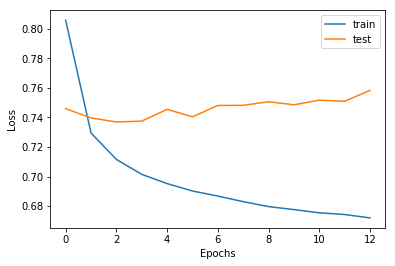

In [61]:
# plot history
plt.plot(hist_1.history['loss'][0:], label='train')
plt.plot(hist_1.history['val_loss'][0:], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
model = load_model('./model/KNN_8_P_A.h5')

In [63]:
#Training error Check
y_pred = pd.DataFrame(model.predict([x_test_scaled.iloc[:,0:3],
                                       x_test_scaled.iloc[:,[3,4,5,9,10,11,15,16,17,21,22,23,27,28,29,33,34,35,39,40,41,45,46,47]],
                                       x_test_scaled.iloc[:,[6,7,8,12,13,14,18,19,20,24,25,26,30,31,32,36,37,38,42,43,44,48,49,50]]]), 
                     columns=['dlt_x','dlt_y','dlt_z','ax_pred','ay_pred','az_pred'])

ValueError: Error when checking model : the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 3 arrays: [array([[-0.63459822,  0.44127996,  0.57024928],
       [-1.60037045, -0.18498131, -0.25144017],
       [-0.91610268, -0.53315218, -0.13411237],
       ...,
       [ 0.71402848,  2.12440684,  1.932872...

In [ ]:
plt.plot(y_test_scaled['dlt_z'] - y_pred.iloc[:,2])

In [ ]:
del_x_idx, = np.where(abs(y_test_scaled['dlt_x'] - y_pred.iloc[:,0]) > 12)
del_y_idx, = np.where(abs(y_test_scaled['dlt_y'] - y_pred.iloc[:,1]) > 12)
del_z_idx, = np.where(abs(y_test_scaled['dlt_z'] - y_pred.iloc[:,2]) > 12)

del_idx = set(del_x_idx) | set(del_y_idx) | set(del_z_idx)

y_test_scaled = y_test_scaled.loc[y_test_scaled.index.drop(list(del_idx))].reset_index(drop=True)
y_pred = y_pred.loc[y_pred.index.drop(list(del_idx))].reset_index(drop=True)

In [ ]:
y_test_inverse = pd.DataFrame(y_scaler.inverse_transform(y_test_scaled))
y_pred_inverse = pd.DataFrame(y_scaler.inverse_transform(y_pred))

In [ ]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(y_test_inverse.iloc[:,0], y_pred_inverse.iloc[:,0], s= 2)
ax1.set_xlabel('dlt_x_real')
ax1.set_ylabel('dlt_x_pred')
ax1.set_xlim((-0.02, 0.02))
ax1.set_ylim((-0.005, 0.005))

ax2.scatter(y_test_inverse.iloc[:,1], y_pred_inverse.iloc[:,1], s= 2)
ax2.set_xlabel('dlt_y_real')
ax2.set_ylabel('dlt_y_pred')
ax2.set_xlim((-0.02, 0.02))
ax2.set_ylim((-0.02, 0.02))

ax3.scatter(y_test_inverse.iloc[:,2], y_pred_inverse.iloc[:,2], s= 2)
ax3.set_xlabel('dlt_z_real')
ax3.set_ylabel('dlt_z_pred')
ax3.set_xlim((-0.02, 0.02))
ax3.set_ylim((-0.02, 0.02))

ax4.scatter(y_test_inverse.iloc[:,3], y_pred_inverse.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(y_test_inverse.iloc[:,4], y_pred_inverse.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(y_test_inverse.iloc[:,5], y_pred_inverse.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

In [ ]:
print('rmse:', np.sqrt(mean_squared_error(y_test_inverse, y_pred_dlt_inverse)))
print('mae:', mean_absolute_error(y_test_inverse, y_pred_dlt_inverse))
print('r2:', r2_score(y_test_inverse, y_pred_dlt_inverse))

In [175]:
#예측
y_pred = pd.DataFrame(model.predict(x_test))

In [176]:
now_data = raw_data.loc[(raw_data['time'] >= 1400) & (raw_data['time'] <= 1998)].reset_index(drop=True)
next_data = raw_data.loc[(raw_data['time'] >= 1401) & (raw_data['time'] <= 1999)].reset_index(drop=True)

next_position = pd.DataFrame(np.array(now_data[['px','py','pz']]) + np.array(y_pred.iloc[:,0:3]), columns=['px_pred','py_pred','pz_pred'])

predicted_df = pd.concat([next_position, y_pred.iloc[:,3:]], axis = 1)

exc_x_idx_test, = np.where(abs(next_data['px'] - predicted_df['px_pred']) > 12)
exc_y_idx_test, = np.where(abs(next_data['py'] - predicted_df['py_pred']) > 12)
exc_z_idx_test, = np.where(abs(next_data['pz'] - predicted_df['pz_pred']) > 12)

exc_idx_test = set(exc_x_idx_test) | set(exc_y_idx_test) | set(exc_z_idx_test)

next_data = next_data.loc[next_data.index.drop(list(exc_idx_test))].reset_index(drop=True)
predicted_df = predicted_df.loc[predicted_df.index.drop(list(exc_idx_test))].reset_index(drop=True)

print('rmse:', np.sqrt(mean_squared_error(next_data.iloc[:,2:5], predicted_df.iloc[:,0:3])))
print('mae:', mean_absolute_error(next_data.iloc[:,2:5], predicted_df.iloc[:,0:3]))
print('r2:', r2_score(next_data.iloc[:,2:5], predicted_df.iloc[:,0:3]))

rmse: 0.022447809731954316
mae: 0.0168962853763136
r2: 0.9999640118536841


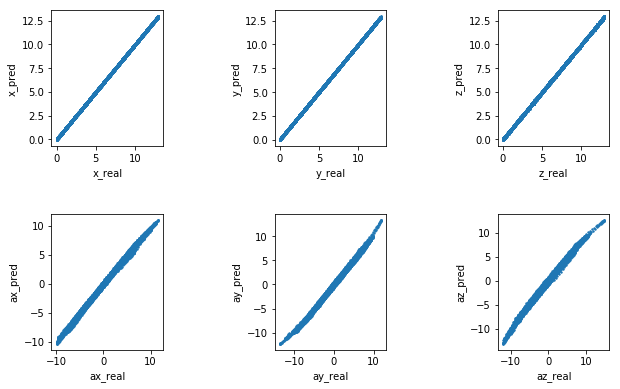

In [177]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(next_data.iloc[:,2], predicted_df.iloc[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(next_data.iloc[:,3], predicted_df.iloc[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(next_data.iloc[:,4], predicted_df.iloc[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(next_data.iloc[:,5], predicted_df.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(next_data.iloc[:,6], predicted_df.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(next_data.iloc[:,7], predicted_df.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

# sadfsd

## asdas

*sadfsadfas*

**sfsdfasd**